## Mini Project - K-Means Clustering
<b> Unsupervised Learning |  K-Means Clustering

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. In this mini-project I will cluster countries based on the Happiness Score dataset. Unlike the supervised learning, the output of this model is not determined, instead we look for a new insight from the data pattern created by clustering process.

<b> What is K-Means Clustering ?</b>

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

source : https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

<b>Dataset Explanation</b>

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


<b>Inspiration</b>

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

dataset source : https://www.kaggle.com/unsdsn/world-happiness


In [2]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<b>It's appears that our data is clean and ready for modelling with K-Means Clustering.</b>

### Feature Selection

We need to do feature selection to make sure the data used for learning is the right one, I considered the feature columns is GDP per capita, Family, Life Expectancy, Freedom, Generosity, Trust because these columns values are cumulated to find Happines Score, so we drop it because it supposed to be the target. I did not use the other columns like country names and rank because it is not necessary for this learning model.

In [5]:
learn_data = df.drop(['Country or region', 'Score', 'Overall rank'], axis=1)

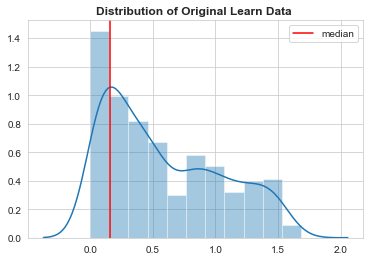

In [6]:
plt.title('Distribution of Original Learn Data ', fontweight='bold')
sns.distplot(learn_data)
plt.axvline(0.1545843772076108, c='red', label='median')
plt.legend()
plt.show()

<b>Our data distribution is not normal as shown from the right-skewed curve, means more data are on the right side of the median. It's needed to do standard scaler to normalize the data distribution.</b>

### Standard Scaler

Standard Scaler is a tools to deal with non-normalized data distribution, Standard Scaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).
Because K-Means is distance based learning algorith, so scaling will be needed to optimize the learning model.

more reading on : https://benalexkeen.com/feature-scaling-with-scikit-learn/#:~:text=Standard%20Scaler,a%20standard%20deviation%20of%201.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
learn_data[learn_data.columns] = scaler.fit_transform(learn_data)

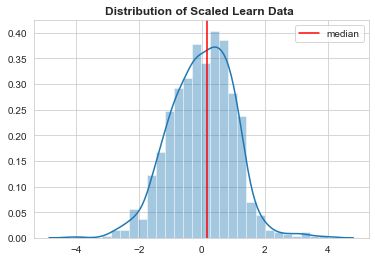

In [8]:
plt.title('Distribution of Scaled Learn Data ', fontweight='bold')
sns.distplot(learn_data)
plt.axvline(0.1545843772076108, c='red', label='median')
plt.legend()
plt.show()

<b>With our data is now scaled to normally distributed. We can continue to PCA.</b>

### PCA

Because the large dimensionality of the data, I decided to perform decomposition using PCA to reduce the dimensionality of the feature into 2 feature.
PCA is meant to reduce the dimensionality of the data while retaining as much information as possible. Higher dimensionlaity tends to raise overfitting issue. In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.

read more on : https://towardsdatascience.com/principal-component-analysis-intro-61f236064b38

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(learn_data)
pca.explained_variance_ratio_.cumsum()

array([0.49826532, 0.73586584])

<b>The PCA model explained about 73.5 % of the data, which is good as the value of explained variance is higher than 60% threshold.

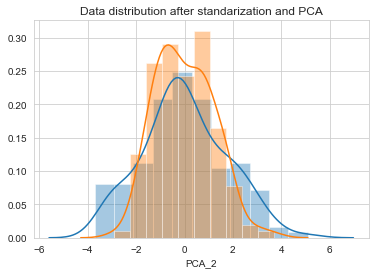

In [10]:
df_pca = pd.DataFrame(pca_result, columns=['PCA_1','PCA_2'])

plt.title('Data distribution after standarization and PCA')
sns.distplot(df_pca['PCA_1'])
sns.distplot(df_pca['PCA_2'])
plt.show()

### K-Means Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
inertia = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               random_state=101)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

In [13]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=101)
    kmeans.fit(df_pca)
    silhouette[i] = silhouette_score(df_pca, kmeans.labels_, metric='euclidean')

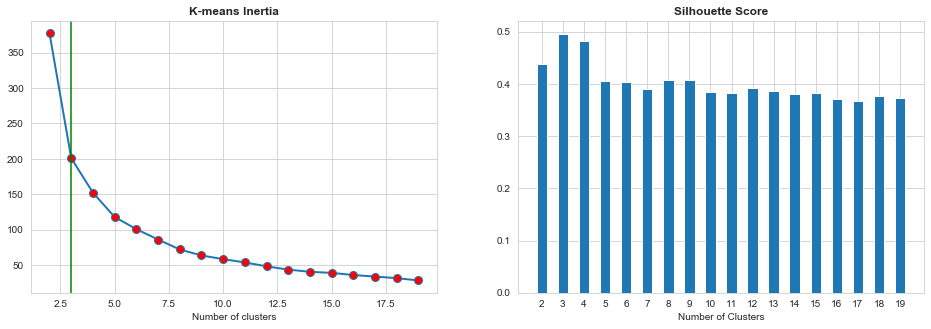

In [14]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(range(2,len(inertia)+2), inertia, marker='o', markerfacecolor='r',lw=2,ms=8)
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.axvline(3, c='green')

plt.subplot(1, 2, 2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')

plt.grid(True)
plt.show()

<b>I found that optimal number of cluster is 3 as shown on the elbow point and it gained the highest silhouette score. So I will use it for the model.</b>

### Modelling with optimal n-cluster

In [15]:
kmeans = KMeans(n_clusters=3,random_state=101)
kmeans.fit(df_pca)
kmeans_labels = kmeans.fit_predict(df_pca)
centroids = kmeans.cluster_centers_

In [16]:
kmeans.predict(df_pca)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
df_kmeans = df_pca.copy()
df_kmeans['Category'] = kmeans.labels_
df_kmeans

,PCA_1,PCA_2,Category
0,-3.134226,1.053542,2
1,-3.292053,1.836057,2
2,-3.338247,1.537896,2
3,-2.592776,0.945854,2
4,-2.835104,1.685571,2
...,...,...,...
151,0.378692,3.023072,1
152,1.332517,1.587694,1
153,3.957017,-0.505351,1
154,5.089682,1.437319,1


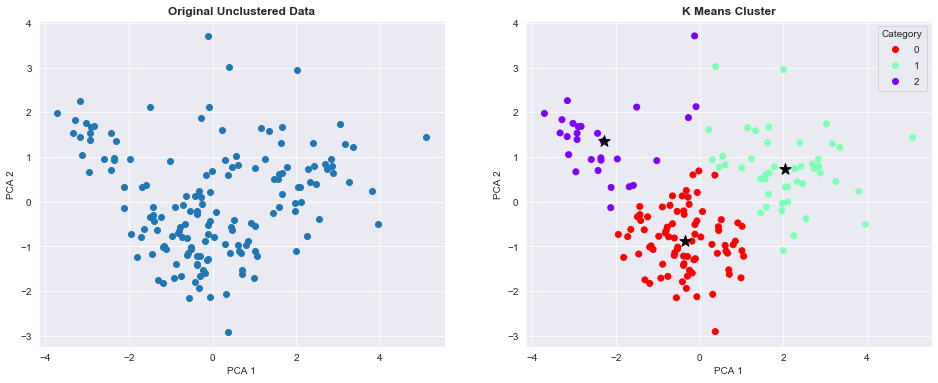

In [46]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.set_style('darkgrid')
# data original
ax[0].set_title('Original Unclustered Data', fontweight='bold')
ax[0].scatter(df_pca['PCA_1'], df_pca['PCA_2'])
# ax[0].scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=140)
# data K Means
ax[1].set_title('K Means Cluster', fontweight='bold')
scatter = ax[1].scatter(df_kmeans['PCA_1'], df_kmeans['PCA_2'], c= df_kmeans['Category'], cmap='rainbow_r')
ax[1].scatter(centroids[:,0], centroids[:,1], c='black', marker='*', s=140)
legend1 = ax[1].legend(*scatter.legend_elements(),
                    loc="upper right", title="Category")

for a in ax.flat:
    a.set(xlabel='PCA 1', ylabel='PCA 2')


plt.show()

### Exploratory Analytics of Clusters Found.

<b>Let's map the category tabel with label value that will explain more clearly the clusters.</b>
    
In this project, because I do not have prequisition or former research for grouping the clusters with certain labels I'll just assign each cluster with numbers.

In [19]:
df['Category'] = df_kmeans['Category']
df['Category'] = df['Category'].map({
                    0:'Cluster 1',
                    1:'Cluster 2',
                    2:'Cluster 3'})

In [20]:
df.groupby('Category')['Score'].mean().sort_values()

Category
Cluster 2    4.263217
Cluster 1    5.597744
Cluster 3    6.728000
Name: Score, dtype: float64

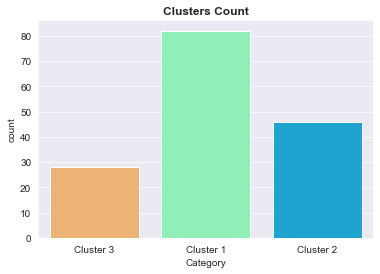

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(df['Category'], palette='rainbow_r')
plt.title('Clusters Count', fontweight='bold')
plt.show()

From the infromation and graph above we found that most of the countries belongs to cluster 4, with average Happiness Score of 5.597, close to the aggregative average of our data of 5.407, it can be said that more countries is on 'average' happiness score group while those belongs to cluster 2 are below average and cluster 1 are above average.

<b>Now let's see what country belongs to each cluster, so we will gained full information of the learning model.

In [23]:
list_1 = df[df['Category']=='Cluster 1']['Country or region'].unique()
list_2 = df[df['Category']=='Cluster 2']['Country or region'].unique()
list_3 = df[df['Category']=='Cluster 3']['Country or region'].unique()
clusters = [list_1, list_2, list_3]
 
for i in range(3) :
    print(f'\n< CLUSTER {i+1}>')
    print(clusters[i])


< CLUSTER 1>
['Costa Rica' 'Israel' 'Czech Republic' 'Mexico' 'France' 'Taiwan' 'Chile'
 'Guatemala' 'Saudi Arabia' 'Spain' 'Panama' 'Brazil' 'Uruguay'
 'El Salvador' 'Italy' 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Latvia' 'South Korea' 'Estonia' 'Jamaica' 'Mauritius'
 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary' 'Paraguay'
 'Northern Cyprus' 'Peru' 'Portugal' 'Russia' 'Philippines' 'Serbia'
 'Moldova' 'Libya' 'Montenegro' 'Croatia' 'Dominican Republic'
 'Bosnia and Herzegovina' 'Turkey' 'Malaysia' 'Belarus' 'Greece'
 'Mongolia' 'North Macedonia' 'Kyrgyzstan' 'Turkmenistan' 'Algeria'
 'Morocco' 'Azerbaijan' 'Lebanon' 'China' 'Vietnam' 'Bulgaria' 'Jordan'
 'Gabon' 'South Africa' 'Albania' 'Venezuela' 'Palestinian Territories'
 'Namibia' 'Armenia' 'Iran' 'Georgia' 'Tunisia' 'Iraq' 'Sri Lanka'
 'Ukraine' 'Egypt' 'Botswana']

< CLUSTER 2>
['Pakistan' 'Tajikistan' 'Nigeria' 'C

<b>Now we knows what country belongs to each cluster. So, it can be said that our final output is done and we can do more analytics with other data like quantitative or report data to support our findings in this learning model.